<a href="https://colab.research.google.com/github/kundajelab/adar_editing/blob/master/xgboost_with_shap/CROSS_SUBSTRATE_TRAINING_XGBOOST_WITH_TREESHAP_TRAIN_NEIL1_PREDICT_OTHERS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Uncomment these lines if running as a google colab notebook: 
#!pip install numpy==1.15
#! git clone https://github.com/kundajelab/adar_editing
#import os
#os.chdir("adar_editing/xgboost_with_shap/")
#!pip install shap
#!pip install --upgrade xgboost
#!pip install cufflinks
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))


In [2]:
%load_ext autoreload
%autoreload 2   

In [3]:
#helper utilities for model training and interpretation 
import shap
import sys 
sys.path.append('..')

from helpers import * 

#set a random seed so code is reproducible 
random.seed(1234)

# load JS visualization code to notebook
shap.initjs()
import warnings
warnings.filterwarnings('ignore')

#visualization utilities 
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
import chart_studio.plotly as plotly
import numpy as np
from plotly.offline import iplot
from plotly.graph_objs import Heatmap

import feature_subsets
import xgboost



In [4]:
## Load all the datasets : TTYH2
ttyh2_comp=pd.read_csv("../../xin_feature_matrices/ttyh2_computational.features.csv",header=0,sep=',',index_col=0)
#remove any null editing level values 
ttyh2_comp=ttyh2_comp[~ttyh2_comp["editing_value"].isnull().values]
ttyh2_comp=format_for_xgboost(ttyh2_comp)

(601, 205)


In [5]:
## Load all the datasets: NEIL1
neil1_comp=pd.read_csv("../../xin_feature_matrices/neil1_computational.features.csv",header=0,sep=',',index_col=0)
#remove any null editing level values 
neil1_comp=neil1_comp[~neil1_comp["editing_value"].isnull().values]
neil1_comp=format_for_xgboost(neil1_comp)

(434, 202)


In [6]:
## Load all the dtasets: AJUBA
ajuba_comp=pd.read_csv("../../xin_feature_matrices/ajuba_bc_computational.features.csv",header=0,sep=',',index_col=0)
#remove any null editing level values 
ajuba_comp=ajuba_comp[~ajuba_comp["editing_value"].isnull().values]
ajuba_comp=format_for_xgboost(ajuba_comp)

(482, 195)


In [7]:
random.seed(1234)
np.random.seed(1234)
train_split,eval_split=split_train_eval_by_mut_pos(neil1_comp[~neil1_comp['mut_pos'].isna()])
null_mut_pos=train_split[train_split['mut_pos'].isna()]
train_split=pd.concat((train_split,null_mut_pos),axis=0)

{20.0: 3, 21.0: 3, 22.0: 4, 23.0: 4, 24.0: 3, 25.0: 4, 26.0: 3, 27.0: 4, 28.0: 4, 29.0: 4, 30.0: 3, 31.0: 4, 32.0: 4, 33.0: 4, 34.0: 4, 35.0: 4, 36.0: 4, 41.0: 21, 42.0: 21, 43.0: 18, 44.0: 18, 45.0: 20, 46.0: 20, 48.0: 20, 49.0: 21, 50.0: 21, 51.0: 20, 52.0: 20, 53.0: 21, 54.0: 19, 55.0: 21, 56.0: 21, 57.0: 15, 58.0: 33}


## Train NEIL1, predict TTYH2

In [8]:
test_split=ttyh2_comp

In [9]:

train_split.reset_index(inplace=True, drop=True) 
eval_split.reset_index(inplace=True,drop=True)
test_split.reset_index(inplace=True,drop=True)

In [10]:
#Remove any non-varying features 
train_novar=get_singleval_features(train_split)
eval_novar=get_singleval_features(eval_split)
test_novar=get_singleval_features(test_split)
uniform_features_to_drop=list(set(train_novar+eval_novar+test_novar))

In [11]:
#Remove any null features 
train_null=get_high_missingness_features(train_split)
eval_null=get_high_missingness_features(eval_split)
test_null=get_high_missingness_features(test_split)
null_features_to_drop=list(set(train_null+eval_null+test_null))

In [12]:
to_drop=list(set(uniform_features_to_drop+null_features_to_drop))
print("\n".join(to_drop))

d1_distance
mut_same_as_site
d2_5prm_cp_bulge:A:U
mut_next_struct:H
u1_3prm_cp_internal
site_5prm_cp_internal:U:G
d1_length_bulge
d2_3prm_cp_bulge:G:U
u3_length_hairpin
site_5prm_cp_hairpin
u1_length_internal_ecs
site_5prm_cp_bulge:C:G
mut_struct:H
mut_type:wt
u2_5prm_cp_internal:U:G
d1_5prm_cp_internal
d2_length_internal_ecs
u3_3prm_cp_bulge
d3_5prm_cp_hairpin
u2_5prm_cp_hairpin:G:C
mut_ref_nt:U
site_3prm_cp_internal:U:A
d3_length_bulge
d2_length_bulge
mut_type:indel
u3_3prm_cp_internal
mut_type:mismatch
d1_length_internal_ecs
d3_length_internal_es
d3_3prm_cp_bulge
mut_ref_struct:S
d2_length_internal_es
site_length_stem
site_struct:M
d2_5prm_cp_bulge:G:U
u1_3prm_cp_bulge
u1_exist
u1_5prm_cp_hairpin
u3_5prm_cp_hairpin
d3_struct:S
site_1_1:A:U
u2_length_internal_ecs
d1_length_hairpin
u3_length_stem
d3_length_hairpin
u1_length_bulge
d2_3prm_cp_internal:G:U
u3_5prm_cp_internal
u2_exist
site_next_nt:C
d2_3prm_cp_bulge:U:A
site_length_bulge
u3_length
u2_3prm_cp_bulge:A:U
u2_5prm_cp_internal

In [13]:
#remove teh features that don't change across isoforms , or are null for all isoforms
for cur_to_drop in to_drop: 
    try:
        train_split=train_split.drop(cur_to_drop,axis=1)
    except: 
        pass
    try:
        eval_split=eval_split.drop(cur_to_drop,axis=1)
    except: 
        pass 
    try:
        test_split=test_split.drop(to_drop,axis=1)
    except: 
        pass

In [14]:

train_y=train_split['editing_value']
train_X=train_split.drop(['editing_value'],axis=1)
eval_y=eval_split['editing_value']
eval_X=eval_split.drop(['editing_value'],axis=1)
test_y=test_split['editing_value']
test_X=test_split.drop(['editing_value'],axis=1)

In [15]:
print(train_X.shape)
print(train_y.shape)
print(eval_X.shape)
print(eval_y.shape)
print(test_X.shape)
print(test_y.shape)

(324, 99)
(324,)
(72, 99)
(72,)
(601, 204)
(601,)


In [16]:
train_cols=set(train_X.columns)
eval_cols=set(eval_X.columns)
test_cols=set(test_X.columns)

In [17]:
common=train_cols.intersection(eval_cols)
common=list(common.intersection(test_cols))
print(common)
train_X=train_X[common]
eval_X=eval_X[common]
test_X=test_X[common]
print(train_X.shape)
print(train_y.shape)
print(eval_X.shape)
print(eval_y.shape)
print(test_X.shape)
print(test_y.shape)

['mfe_frequency', 'mut_ref_nt:A', 'd3_length', 'u2_distance', 'd2_distance', 'site_prev_nt:A', 'd2_5prm_cp_internal:U:G', 'u_all_stem_length', 'sim_nor_score', 'u3_distance', 'd2_5prm_cp_internal:A:U', 'u2_3prm_cp_bulge:C:G', 'site_prev_nt:U', 'site_3prm_cp_internal:G:U', 'u3_struct:S', 'u2_5prm_cp_internal:C:G', 'd_count', 'site_5prm_cp_internal:C:G', 'u2_struct:I', 'd2_3prm_cp_bulge:C:G', 'mut_site_dist', 'u2_3prm_cp_bulge:G:U', 'd_all_stem_length', 'site_3prm_cp_internal:C:G', 'd2_5prm_cp_internal:G:C', 'd2_3prm_cp_internal:U:A', 'minimum_free_energy', 'site_3prm_cp_internal:G:C', 'mut_ref_nt:C', 'd3_length_stem', 'site_next_nt:U', 'mut_struct:B', 'd2_5prm_cp_bulge:C:G', 'site_next_nt:A', 'mut_struct:S', 'd2_3prm_cp_internal:C:G', 'site_3prm_cp_bulge:G:C', 'site_length_internal_ecs', 'site_length_internal_es', 'u3_exist', 'mut_next_struct:S', 'd2_5prm_cp_bulge:G:C', 'd2_struct:B', 'u1_length_stem', 'u1_struct:S', 'mut_nt:A', 'u2_struct:B', 'u2_length', 'u2_struct:H', 'mut_struct:I',

In [18]:
## format matrixes for xgboost 
import xgboost
dtrain=xgboost.DMatrix(train_X,train_y)
deval=xgboost.DMatrix(eval_X,eval_y)
dtest=xgboost.DMatrix(test_X,test_y)

In [19]:
## set model training parameters 
from __future__ import unicode_literals
param=dict() 
param['nthread'] = 20
#rmse -- root mean square error 
# mae -- mean absolute error 
# map -- mean average precision 
# auc -- area under ROC curve 
# aucpr -- area under precision recall curve 

#Note: the last metric in your 'eval_metric' list will get optimized 
param['eval_metric'] = ['aucpr','auc','mae','map','rmse']

In [20]:
evallist = [(deval, 'eval'), (dtrain, 'train')]


In [21]:
num_round = 1000
random.seed(1234)
np.random.seed(1234)
bst = xgboost.train(param, dtrain, num_round, evallist,early_stopping_rounds=10)

[0]	eval-aucpr:0.49121	eval-auc:0.74545	eval-mae:0.19960	eval-map:1.00000	eval-rmse:0.22910	train-aucpr:0.58033	train-auc:0.82069	train-mae:0.20564	train-map:1.00000	train-rmse:0.24165
Multiple eval metrics have been passed: 'train-rmse' will be used for early stopping.

Will train until train-rmse hasn't improved in 10 rounds.
[1]	eval-aucpr:0.51846	eval-auc:0.75312	eval-mae:0.15787	eval-map:1.00000	eval-rmse:0.18095	train-aucpr:0.59064	train-auc:0.82546	train-mae:0.15085	train-map:1.00000	train-rmse:0.17713
[2]	eval-aucpr:0.54397	eval-auc:0.77531	eval-mae:0.12230	eval-map:1.00000	eval-rmse:0.14704	train-aucpr:0.59642	train-auc:0.83041	train-mae:0.11127	train-map:1.00000	train-rmse:0.13131
[3]	eval-aucpr:0.53863	eval-auc:0.77492	eval-mae:0.10364	eval-map:1.00000	eval-rmse:0.12952	train-aucpr:0.59945	train-auc:0.83453	train-mae:0.08401	train-map:1.00000	train-rmse:0.09981
[4]	eval-aucpr:0.54081	eval-auc:0.77628	eval-mae:0.08963	eval-map:1.00000	eval-rmse:0.11918	train-aucpr:0.60084	tra

[44]	eval-aucpr:0.54682	eval-auc:0.78546	eval-mae:0.06143	eval-map:1.00000	eval-rmse:0.10806	train-aucpr:0.60898	train-auc:0.84317	train-mae:0.00377	train-map:1.00000	train-rmse:0.00542
[45]	eval-aucpr:0.54689	eval-auc:0.78551	eval-mae:0.06141	eval-map:1.00000	eval-rmse:0.10803	train-aucpr:0.60899	train-auc:0.84318	train-mae:0.00367	train-map:1.00000	train-rmse:0.00532
[46]	eval-aucpr:0.54690	eval-auc:0.78550	eval-mae:0.06123	eval-map:1.00000	eval-rmse:0.10790	train-aucpr:0.60903	train-auc:0.84319	train-mae:0.00343	train-map:1.00000	train-rmse:0.00496
[47]	eval-aucpr:0.54584	eval-auc:0.78498	eval-mae:0.06118	eval-map:1.00000	eval-rmse:0.10792	train-aucpr:0.60903	train-auc:0.84320	train-mae:0.00322	train-map:1.00000	train-rmse:0.00457
[48]	eval-aucpr:0.54690	eval-auc:0.78551	eval-mae:0.06121	eval-map:1.00000	eval-rmse:0.10782	train-aucpr:0.60904	train-auc:0.84320	train-mae:0.00301	train-map:1.00000	train-rmse:0.00428
[49]	eval-aucpr:0.54699	eval-auc:0.78560	eval-mae:0.06126	eval-map:1.0

In [22]:
## get model predictions on the test, training, and eval splits 
test_pred = bst.predict(dtest)
train_pred=bst.predict(dtrain)
eval_pred=bst.predict(deval)

In [23]:
## Get performance metrics on full dataset 
from helpers import * 
print_aggregate_peformance_metrics(train_y,train_pred,
                                   eval_y,eval_pred,
                                   test_y,test_pred,
                                   positive_thresh=0.2)

Train
	Spearman corr : SpearmanrResult(correlation=0.9989010745178001, pvalue=0.0)
	Pearson corr : (0.9999842390219315, 0.0)
	MAE : 0.0009403617072557265
	MAPE : 0.009394531592682012
	RMSE : 0.001375747094102642
	auPRC : 1.0
	auROC : 1.0
Eval
	Spearman corr : SpearmanrResult(correlation=0.888989481435886, pvalue=1.9192672231455042e-25)
	Pearson corr : (0.8886772406201757, 2.10602776802227e-25)
	MAE : 0.06103391721223791
	MAPE : 0.3131872126418607
	RMSE : 0.10783375990292941
	auPRC : 0.9500950086567171
	auROC : 0.9539682539682539
Test
	Spearman corr : SpearmanrResult(correlation=0.4577637456645437, pvalue=1.8343856551804736e-32)
	Pearson corr : (0.4030848556712529, 6.941646967712257e-25)
	MAE : 0.17731303159171052
	MAPE : 3.505215333282175
	RMSE : 0.2331445976716063
	auPRC : 0.5882627354919707
	auROC : 0.7533768834858754


In [24]:
## Correlation values 
from scipy.stats import spearmanr,pearsonr
spearman_train=spearmanr(train_y,train_pred)
spearman_eval=spearmanr(eval_y,eval_pred)
spearman_test=spearmanr(test_y,test_pred)

pearson_train=pearsonr(train_y,train_pred)
pearson_eval=pearsonr(eval_y,eval_pred)
pearson_test=pearsonr(test_y,test_pred)

print("Spearman correlation:")
print("Train:"+str(spearman_train))
print("Eval:"+str(spearman_eval))
print("Test:"+str(spearman_test))
print("\n")
print("Pearson correlation:")
print("Train:"+str(pearson_train))
print("Eval:"+str(pearson_eval))
print("Test:"+str(pearson_test))

Spearman correlation:
Train:SpearmanrResult(correlation=0.9989010745178001, pvalue=0.0)
Eval:SpearmanrResult(correlation=0.888989481435886, pvalue=1.9192672231455042e-25)
Test:SpearmanrResult(correlation=0.4577637456645437, pvalue=1.8343856551804736e-32)


Pearson correlation:
Train:(0.9999842390219315, 0.0)
Eval:(0.8886772406201757, 2.10602776802227e-25)
Test:(0.4030848556712529, 6.941646967712257e-25)


In [25]:
## MAE
from sklearn.metrics import mean_absolute_error
mae_train=mean_absolute_error(train_y,train_pred)
print("MAE Train:"+str(mae_train))

mae_eval=mean_absolute_error(eval_y,eval_pred)
print("MAE Eval:"+str(mae_eval))

mae_test=mean_absolute_error(test_y,test_pred)
print("MAE Test:"+str(mae_test))


MAE Train:0.0009403617072557265
MAE Eval:0.06103391721223791
MAE Test:0.17731303159171052


In [26]:
## MAPE
pseudocount=0.01
mape_train=np.mean(np.abs((train_y - train_pred) /(pseudocount+train_y))) * 100
print("MAPE Train:"+str(mape_train)+"%")

mape_eval=np.mean(np.abs((eval_y - eval_pred) /(pseudocount+eval_y))) * 100
print("MAPE Eval:"+str(mape_eval)+"%")

mape_test=np.mean(np.abs((test_y - test_pred) /(pseudocount+test_y))) * 100
print("MAPE Test:"+str(mape_test)+"%")

MAPE Train:0.9394531592682012%
MAPE Eval:31.318721264186074%
MAPE Test:350.5215333282175%


In [27]:
## RMSE
from sklearn.metrics import mean_squared_error
import math 
rmse_train=math.sqrt(mean_squared_error(train_y,train_pred))
print("RMSE Train:"+str(rmse_train))

rmse_eval=math.sqrt(mean_squared_error(eval_y,eval_pred))
print("RMSE Eval:"+str(rmse_eval))

rmse_test=math.sqrt(mean_squared_error(test_y,test_pred))
print("RMSE Test:"+str(rmse_test))


RMSE Train:0.001375747094102642
RMSE Eval:0.10783375990292941
RMSE Test:0.2331445976716063


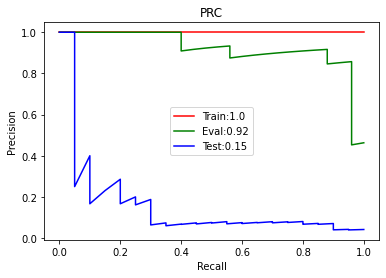

In [28]:
## PRC 
## PRC only valid for binary outcomes. 
## Editing levels < 0.5 are labeled as "0". 
## Editing levels >= 0.5 are labeled as "1". 

from sklearn.metrics import auc, precision_recall_curve

precision_train,recall_train,prc_thresholds_train=precision_recall_curve(train_y>=0.4,train_pred)
precision_eval,recall_eval,prc_thresholds_eval=precision_recall_curve(eval_y>=0.4,eval_pred)
precision_test,recall_test,prc_thresholds_test=precision_recall_curve(test_y>=0.4,test_pred)

auprc_train=auc(recall_train,precision_train)
auprc_eval=auc(recall_eval,precision_eval)
auprc_test=auc(recall_test,precision_test)

plt.plot(recall_train,precision_train,'r',label="Train:"+str(round(auprc_train,2)))
plt.plot(recall_eval,precision_eval,'g',label="Eval:"+str(round(auprc_eval,2)))
plt.plot(recall_test,precision_test,'b',label="Test:"+str(round(auprc_test,2)))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PRC")
plt.legend()

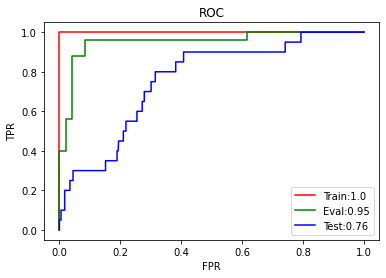

In [29]:
## ROC
from sklearn.metrics import roc_curve, roc_auc_score
fpr_train,tpr_train,roc_thresholds_train=roc_curve(train_y>=0.4,train_pred)
fpr_eval,tpr_eval,roc_thresholds_eval=roc_curve(eval_y>=0.4,eval_pred)
fpr_test,tpr_test,roc_thresholds_test=roc_curve(test_y>=0.4,test_pred)

auroc_train=roc_auc_score(train_y>=0.4,train_pred)
auroc_eval=roc_auc_score(eval_y>=0.4,eval_pred)
auroc_test=roc_auc_score(test_y>=0.4,test_pred)

plt.plot(fpr_train,tpr_train,'r',label="Train:"+str(round(auroc_train,2)))
plt.plot(fpr_eval,tpr_eval,'g',label="Eval:"+str(round(auroc_eval,2)))
plt.plot(fpr_test,tpr_test,'b',label="Test:"+str(round(auroc_test,2)))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.legend()

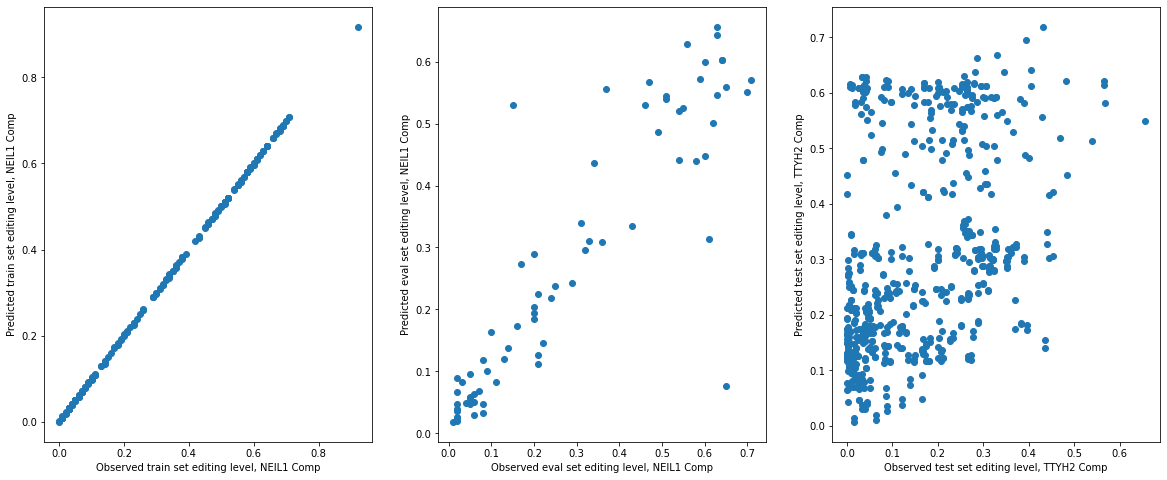

In [30]:
#plot the test set predictions 
matplotlib.rcParams['figure.figsize'] = [20, 8]
plt.subplot(1,3,1)
plt.plot(list(train_y),list(train_pred),'o')
plt.xlabel("Observed train set editing level, NEIL1 Comp")
plt.ylabel("Predicted train set editing level, NEIL1 Comp")
plt.subplot(1,3,2)
plt.plot(list(eval_y),list(eval_pred),'o')
plt.xlabel("Observed eval set editing level, NEIL1 Comp")
plt.ylabel("Predicted eval set editing level, NEIL1 Comp")
plt.subplot(1,3,3)
plt.plot(list(test_y),list(test_pred),'o')
plt.xlabel("Observed test set editing level, TTYH2 Comp")
plt.ylabel("Predicted test set editing level, TTYH2 Comp")
plt.show()

In [31]:
#calculate R^2, which is representative of variance explained 
# https://datascienceplus.com/extreme-gradient-boosting-with-r/
# https://arxiv.org/pdf/1706.06060.pdf

residuals = test_y - test_pred
print(np.mean(test_y))
y_test_mean = np.mean(test_pred)
print(y_test_mean)
#calculate total sum of squares 
tss=sum((test_y-y_test_mean)*(test_y-y_test_mean))
print(tss)
# Calculate residual sum of squares
rss =  sum(residuals*residuals)
print(rss)
# Calculate R-squared
rsq  =  1 - (rss/tss)
print('The R-square of the test data is ', round(rsq,3), '\n')

0.15661647254575706
0.3080134
24.121643868377976
32.66819845749658
The R-square of the test data is  -0.354 



## Train NEIL1, predict AJUBA

In [32]:
test_split=ajuba_comp

In [33]:
train_split.reset_index(inplace=True, drop=True) 
eval_split.reset_index(inplace=True,drop=True)
test_split.reset_index(inplace=True,drop=True)

In [34]:
#Remove any non-varying features 
train_novar=get_singleval_features(train_split)
eval_novar=get_singleval_features(eval_split)
test_novar=get_singleval_features(test_split)
uniform_features_to_drop=list(set(train_novar+eval_novar+test_novar))

In [35]:
#Remove any null features 
train_null=get_high_missingness_features(train_split)
eval_null=get_high_missingness_features(eval_split)
test_null=get_high_missingness_features(test_split)
null_features_to_drop=list(set(train_null+eval_null+test_null))

In [36]:
to_drop=list(set(uniform_features_to_drop+null_features_to_drop))
print("\n".join(to_drop))

d1_distance
d3_exist
u1_exist
u1_5prm_cp_hairpin
u3_5prm_cp_hairpin
d2_length_stem
d3_5prm_cp_bulge
d3_struct:S
d1_length_hairpin
u3_length_internal_es
u1_length_hairpin
d1_3prm_cp_internal
u1_length_bulge
d1_length_bulge
site_length_hairpin
d3_length_hairpin
d3_length_bulge
d2_length_bulge
d2_5prm_cp_hairpin
u2_exist
site_length_bulge
d3_5prm_cp_hairpin
d2_exist
site_5prm_cp_hairpin
u3_length_hairpin
d2_length_hairpin
d1_3prm_cp_bulge
u1_length_internal_ecs
u2_length_bulge
u3_length_bulge
d3_3prm_cp_internal
u3_exist
u3_length_internal_ecs
u2_5prm_cp_hairpin
d1_exist
d3_length_internal_ecs
d1_length_internal_ecs
d3_length_internal_es
u2_length_hairpin
d1_5prm_cp_bulge
d3_3prm_cp_bulge
d1_5prm_cp_internal
d3_5prm_cp_internal
u1_length_internal_es
d1_length_internal_es
u1_distance
d1_struct:S
site_length_stem
u2_length_stem
site_next_struct:S
d1_5prm_cp_hairpin


In [37]:
#remove teh features that don't change across isoforms , or are null for all isoforms
for cur_to_drop in to_drop: 
    try:
        train_split=train_split.drop(cur_to_drop,axis=1)
    except: 
        pass
    try:
        eval_split=eval_split.drop(cur_to_drop,axis=1)
    except: 
        pass 
    try:
        test_split=test_split.drop(to_drop,axis=1)
    except: 
        pass

In [38]:
train_y=train_split['editing_value']
train_X=train_split.drop(['editing_value'],axis=1)
eval_y=eval_split['editing_value']
eval_X=eval_split.drop(['editing_value'],axis=1)
test_y=test_split['editing_value']
test_X=test_split.drop(['editing_value'],axis=1)

In [39]:
print(train_X.shape)
print(train_y.shape)
print(eval_X.shape)
print(eval_y.shape)
print(test_X.shape)
print(test_y.shape)

(324, 98)
(324,)
(72, 98)
(72,)
(482, 143)
(482,)


In [40]:
train_cols=set(train_X.columns)
eval_cols=set(eval_X.columns)
test_cols=set(test_X.columns)

In [41]:
common=train_cols.intersection(eval_cols)
common=list(common.intersection(test_cols))
print(common)
train_X=train_X[common]
eval_X=eval_X[common]
test_X=test_X[common]
print(train_X.shape)
print(train_y.shape)
print(eval_X.shape)
print(eval_y.shape)
print(test_X.shape)
print(test_y.shape)

['mfe_frequency', 'mut_ref_nt:A', 'd3_length', 'u2_distance', 'd2_distance', 'd2_5prm_cp_internal:U:A', 'site_prev_nt:A', 'd2_5prm_cp_internal:U:G', 'u_all_stem_length', 'sim_nor_score', 'u3_distance', 'd2_5prm_cp_internal:A:U', 'u2_3prm_cp_bulge:C:G', 'site_prev_nt:U', 'u3_struct:S', 'u2_5prm_cp_internal:C:G', 'd_count', 'site_5prm_cp_internal:C:G', 'u2_struct:I', 'd2_3prm_cp_bulge:C:G', 'mut_site_dist', 'd_all_stem_length', 'd2_5prm_cp_internal:G:C', 'd2_3prm_cp_internal:U:A', 'minimum_free_energy', 'site_3prm_cp_internal:G:C', 'mut_ref_nt:C', 'd3_length_stem', 'site_next_nt:U', 'mut_struct:B', 'd2_5prm_cp_bulge:C:G', 'site_next_nt:A', 'mut_struct:S', 'd2_3prm_cp_internal:C:G', 'site_3prm_cp_bulge:G:C', 'site_length_internal_ecs', 'site_length_internal_es', 'mut_next_struct:S', 'd2_5prm_cp_bulge:G:C', 'd2_struct:B', 'u1_length_stem', 'u1_struct:S', 'mut_nt:A', 'u2_struct:B', 'u2_length', 'mut_struct:I', 'u2_3prm_cp_bulge:G:C', 'd3_distance', 'u_count', 'site_length', 'mut_nt:U', 'ens

In [42]:
## format matrixes for xgboost 
import xgboost
dtrain=xgboost.DMatrix(train_X,train_y)
deval=xgboost.DMatrix(eval_X,eval_y)
dtest=xgboost.DMatrix(test_X,test_y)

In [43]:
## set model training parameters 
from __future__ import unicode_literals
param=dict() 
param['nthread'] = 20
#rmse -- root mean square error 
# mae -- mean absolute error 
# map -- mean average precision 
# auc -- area under ROC curve 
# aucpr -- area under precision recall curve 

#Note: the last metric in your 'eval_metric' list will get optimized 
param['eval_metric'] = ['aucpr','auc','mae','map','rmse']

In [44]:
evallist = [(deval, 'eval'), (dtrain, 'train')]


In [45]:
num_round = 1000
random.seed(1234)
np.random.seed(1234)
bst = xgboost.train(param, dtrain, num_round, evallist,early_stopping_rounds=10)

[0]	eval-aucpr:0.49121	eval-auc:0.74545	eval-mae:0.19960	eval-map:1.00000	eval-rmse:0.22910	train-aucpr:0.58033	train-auc:0.82069	train-mae:0.20564	train-map:1.00000	train-rmse:0.24165
Multiple eval metrics have been passed: 'train-rmse' will be used for early stopping.

Will train until train-rmse hasn't improved in 10 rounds.
[1]	eval-aucpr:0.51846	eval-auc:0.75312	eval-mae:0.15787	eval-map:1.00000	eval-rmse:0.18095	train-aucpr:0.59064	train-auc:0.82546	train-mae:0.15085	train-map:1.00000	train-rmse:0.17713
[2]	eval-aucpr:0.53946	eval-auc:0.76072	eval-mae:0.12449	eval-map:1.00000	eval-rmse:0.14854	train-aucpr:0.59542	train-auc:0.82784	train-mae:0.11192	train-map:1.00000	train-rmse:0.13191
[3]	eval-aucpr:0.53848	eval-auc:0.75638	eval-mae:0.10721	eval-map:1.00000	eval-rmse:0.13266	train-aucpr:0.59835	train-auc:0.83224	train-mae:0.08494	train-map:1.00000	train-rmse:0.10100
[4]	eval-aucpr:0.54525	eval-auc:0.77112	eval-mae:0.09249	eval-map:1.00000	eval-rmse:0.12181	train-aucpr:0.59952	tra

[44]	eval-aucpr:0.55385	eval-auc:0.78669	eval-mae:0.05774	eval-map:1.00000	eval-rmse:0.10731	train-aucpr:0.60901	train-auc:0.84319	train-mae:0.00318	train-map:1.00000	train-rmse:0.00456
[45]	eval-aucpr:0.55385	eval-auc:0.78669	eval-mae:0.05765	eval-map:1.00000	eval-rmse:0.10728	train-aucpr:0.60902	train-auc:0.84320	train-mae:0.00309	train-map:1.00000	train-rmse:0.00446
[46]	eval-aucpr:0.55280	eval-auc:0.78652	eval-mae:0.05764	eval-map:1.00000	eval-rmse:0.10730	train-aucpr:0.60903	train-auc:0.84320	train-mae:0.00298	train-map:1.00000	train-rmse:0.00426
[47]	eval-aucpr:0.55279	eval-auc:0.78650	eval-mae:0.05767	eval-map:1.00000	eval-rmse:0.10731	train-aucpr:0.60903	train-auc:0.84320	train-mae:0.00291	train-map:1.00000	train-rmse:0.00419
[48]	eval-aucpr:0.55278	eval-auc:0.78648	eval-mae:0.05770	eval-map:1.00000	eval-rmse:0.10729	train-aucpr:0.60906	train-auc:0.84321	train-mae:0.00278	train-map:1.00000	train-rmse:0.00398
[49]	eval-aucpr:0.55279	eval-auc:0.78652	eval-mae:0.05784	eval-map:1.0

In [46]:
## get model predictions on the test, training, and eval splits 
test_pred = bst.predict(dtest)
train_pred=bst.predict(dtrain)
eval_pred=bst.predict(deval)

In [47]:
## Get performance metrics on full dataset 
from helpers import * 
print_aggregate_peformance_metrics(train_y,train_pred,
                                   eval_y,eval_pred,
                                   test_y,test_pred,
                                   positive_thresh=0.07)

Train
	Spearman corr : SpearmanrResult(correlation=0.9989011626253197, pvalue=0.0)
	Pearson corr : (0.9999866019630681, 0.0)
	MAE : 0.0008930659772724741
	MAPE : 0.010008768713087325
	RMSE : 0.0012636518394489368
	auPRC : 1.0
	auROC : 0.9999999999999999
Eval
	Spearman corr : SpearmanrResult(correlation=0.8995152095997476, pvalue=7.053886206165914e-27)
	Pearson corr : (0.8923235895165658, 6.99594216207191e-26)
	MAE : 0.05742329727547863
	MAPE : 0.24579978958395887
	RMSE : 0.1070473793726287
	auPRC : 0.9899554871669425
	auROC : 0.9732510288065843
Test
	Spearman corr : SpearmanrResult(correlation=0.681917128939662, pvalue=3.381437909075597e-67)
	Pearson corr : (0.6604865774159422, 1.005145287371309e-61)
	MAE : 0.20392069163692483
	MAPE : 6.224726039857029
	RMSE : 0.241061995635799
	auPRC : 0.6918229041948301
	auROC : 0.9598736176935229


In [48]:
## Correlation values 
from scipy.stats import spearmanr,pearsonr
spearman_train=spearmanr(train_y,train_pred)
spearman_eval=spearmanr(eval_y,eval_pred)
spearman_test=spearmanr(test_y,test_pred)

pearson_train=pearsonr(train_y,train_pred)
pearson_eval=pearsonr(eval_y,eval_pred)
pearson_test=pearsonr(test_y,test_pred)

print("Spearman correlation:")
print("Train:"+str(spearman_train))
print("Eval:"+str(spearman_eval))
print("Test:"+str(spearman_test))
print("\n")
print("Pearson correlation:")
print("Train:"+str(pearson_train))
print("Eval:"+str(pearson_eval))
print("Test:"+str(pearson_test))

Spearman correlation:
Train:SpearmanrResult(correlation=0.9989011626253197, pvalue=0.0)
Eval:SpearmanrResult(correlation=0.8995152095997476, pvalue=7.053886206165914e-27)
Test:SpearmanrResult(correlation=0.681917128939662, pvalue=3.381437909075597e-67)


Pearson correlation:
Train:(0.9999866019630681, 0.0)
Eval:(0.8923235895165658, 6.99594216207191e-26)
Test:(0.6604865774159422, 1.005145287371309e-61)


In [49]:
## MAE
from sklearn.metrics import mean_absolute_error
mae_train=mean_absolute_error(train_y,train_pred)
print("MAE Train:"+str(mae_train))

mae_eval=mean_absolute_error(eval_y,eval_pred)
print("MAE Eval:"+str(mae_eval))

mae_test=mean_absolute_error(test_y,test_pred)
print("MAE Test:"+str(mae_test))


MAE Train:0.0008930659772724741
MAE Eval:0.05742329727547863
MAE Test:0.20392069163692483


In [50]:
## MAPE
pseudocount=0.01
mape_train=np.mean(np.abs((train_y - train_pred) /(pseudocount+train_y))) * 100
print("MAPE Train:"+str(mape_train)+"%")

mape_eval=np.mean(np.abs((eval_y - eval_pred) /(pseudocount+eval_y))) * 100
print("MAPE Eval:"+str(mape_eval)+"%")

mape_test=np.mean(np.abs((test_y - test_pred) /(pseudocount+test_y))) * 100
print("MAPE Test:"+str(mape_test)+"%")

MAPE Train:1.0008768713087324%
MAPE Eval:24.579978958395888%
MAPE Test:622.4726039857029%


In [51]:
## RMSE
from sklearn.metrics import mean_squared_error
import math 
rmse_train=math.sqrt(mean_squared_error(train_y,train_pred))
print("RMSE Train:"+str(rmse_train))

rmse_eval=math.sqrt(mean_squared_error(eval_y,eval_pred))
print("RMSE Eval:"+str(rmse_eval))

rmse_test=math.sqrt(mean_squared_error(test_y,test_pred))
print("RMSE Test:"+str(rmse_test))


RMSE Train:0.0012636518394489368
RMSE Eval:0.1070473793726287
RMSE Test:0.241061995635799


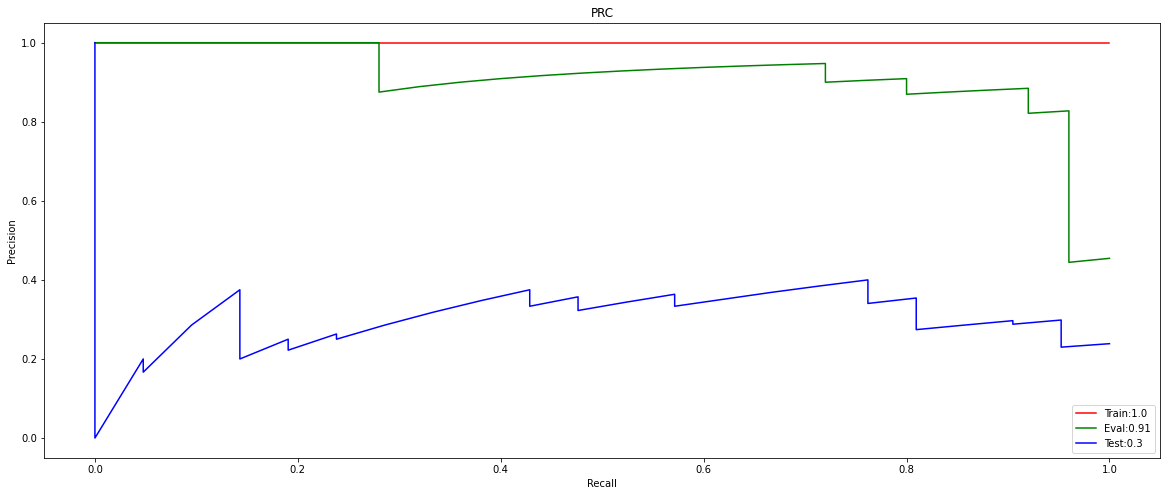

In [52]:
## PRC 
## PRC only valid for binary outcomes. 
## Editing levels < 0.5 are labeled as "0". 
## Editing levels >= 0.5 are labeled as "1". 

from sklearn.metrics import auc, precision_recall_curve

precision_train,recall_train,prc_thresholds_train=precision_recall_curve(train_y>=0.4,train_pred)
precision_eval,recall_eval,prc_thresholds_eval=precision_recall_curve(eval_y>=0.4,eval_pred)
precision_test,recall_test,prc_thresholds_test=precision_recall_curve(test_y>=0.2,test_pred)

auprc_train=auc(recall_train,precision_train)
auprc_eval=auc(recall_eval,precision_eval)
auprc_test=auc(recall_test,precision_test)

plt.plot(recall_train,precision_train,'r',label="Train:"+str(round(auprc_train,2)))
plt.plot(recall_eval,precision_eval,'g',label="Eval:"+str(round(auprc_eval,2)))
plt.plot(recall_test,precision_test,'b',label="Test:"+str(round(auprc_test,2)))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PRC")
plt.legend()

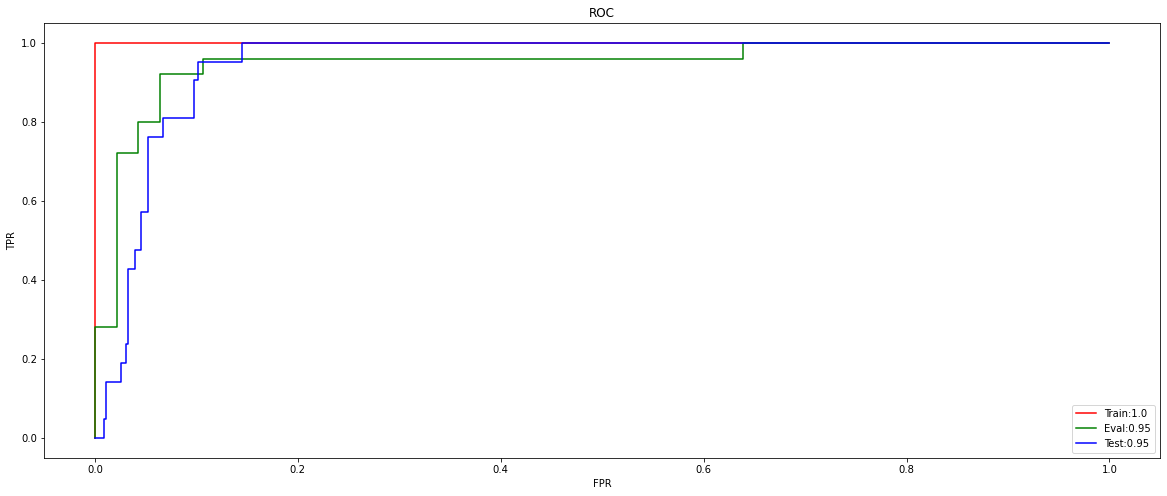

In [53]:
## ROC
from sklearn.metrics import roc_curve, roc_auc_score
fpr_train,tpr_train,roc_thresholds_train=roc_curve(train_y>=0.4,train_pred)
fpr_eval,tpr_eval,roc_thresholds_eval=roc_curve(eval_y>=0.4,eval_pred)
fpr_test,tpr_test,roc_thresholds_test=roc_curve(test_y>=0.2,test_pred)

auroc_train=roc_auc_score(train_y>=0.4,train_pred)
auroc_eval=roc_auc_score(eval_y>=0.4,eval_pred)
auroc_test=roc_auc_score(test_y>=0.2,test_pred)

plt.plot(fpr_train,tpr_train,'r',label="Train:"+str(round(auroc_train,2)))
plt.plot(fpr_eval,tpr_eval,'g',label="Eval:"+str(round(auroc_eval,2)))
plt.plot(fpr_test,tpr_test,'b',label="Test:"+str(round(auroc_test,2)))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.legend()

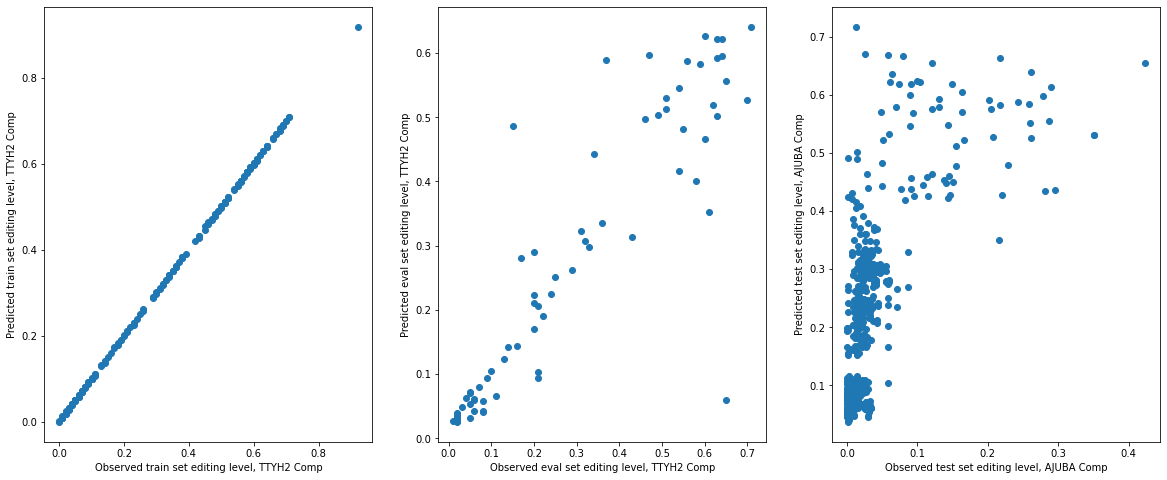

In [54]:
#plot the test set predictions 
matplotlib.rcParams['figure.figsize'] = [20, 8]
plt.subplot(1,3,1)
plt.plot(list(train_y),list(train_pred),'o')
plt.xlabel("Observed train set editing level, TTYH2 Comp")
plt.ylabel("Predicted train set editing level, TTYH2 Comp")
plt.subplot(1,3,2)
plt.plot(list(eval_y),list(eval_pred),'o')
plt.xlabel("Observed eval set editing level, TTYH2 Comp")
plt.ylabel("Predicted eval set editing level, TTYH2 Comp")
plt.subplot(1,3,3)
plt.plot(list(test_y),list(test_pred),'o')
plt.xlabel("Observed test set editing level, AJUBA Comp")
plt.ylabel("Predicted test set editing level, AJUBA Comp")

plt.show()

In [55]:
#calculate R^2, which is representative of variance explained 
# https://datascienceplus.com/extreme-gradient-boosting-with-r/
# https://arxiv.org/pdf/1706.06060.pdf

residuals = test_y - test_pred

y_test_mean = np.mean(test_pred)
print(y_test_mean)
#calculate total sum of squares 
tss=sum((test_y-y_test_mean)*(test_y-y_test_mean))
print(tss)
# Calculate residual sum of squares
rss =  sum(residuals*residuals)
print(rss)
# Calculate R-squared
rsq  =  1 - (rss/tss)
print('The R-square of the test data is ', round(rsq,3), '\n')

0.24233252
21.675034362075756
28.009446926638535
The R-square of the test data is  -0.292 

